In [1]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crypto_data.csv', index_col=0)  

In [3]:
trading_df = df[df.IsTrading != False]

In [4]:
trading_df.dropna()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
trading_df = trading_df[trading_df.TotalCoinsMined >= 1]

In [6]:
trading_df.drop(columns=['CoinName'], inplace=True)

In [7]:
X=pd.get_dummies(trading_df,columns=['Algorithm','ProofType'])
X.head()

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.        , -0.11710817, -0.1528703 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        , -0.09396955, -0.145009  , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        ,  0.52494561,  4.48942416, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [ 0.        , -0.09561336, -0.13217937, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        , -0.11694817, -0.15255998, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.        , -0.11710536, -0.15285552, ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [9]:
pca = PCA(n_components=0.99)
crypto_pca = pca.fit_transform(X_scaled)

In [10]:
tsne = TSNE(learning_rate=50)
tsne_fit = tsne.fit_transform(crypto_pca)
tsne_fit

array([[-11.54959  ,   1.1957223],
       [-17.436361 ,  -2.84751  ],
       [-22.297745 ,   8.32247  ],
       ...,
       [ 23.938787 ,  -2.564559 ],
       [ 17.428501 ,   3.5354166],
       [  1.3813457,  12.802895 ]], dtype=float32)

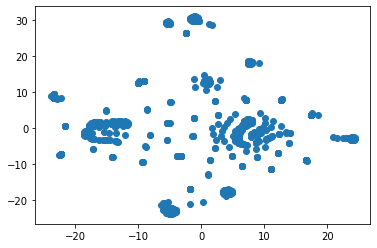

In [11]:
trading_df['x'] = tsne_fit[:,0]
trading_df['y'] = tsne_fit[:,1]
plt.scatter(trading_df['x'], trading_df['y'])
plt.show()